<a href="https://colab.research.google.com/github/AlejandroVillazonG/MAT468/blob/main/labs/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Se define el modelo autorregresivo de orden 1 (AR(1)) como: $$X_t = \phi X_{t-1} + \epsilon_t$$con los $\epsilon_t$ i.i.d. con $\epsilon_t \sim N(0,\sigma^2)$.

#### a) Verifique si es cadena de Markov.

`Solución:` Verifiquemos la propiedad de Markov. Dado que $\epsilon_t$ es i.i.d. tenemos que $\epsilon_t$ es independiente de $X_{t-1},X_{t-2}\ldots,X_{0}$. Por ende, tenemos lo siguiente

$$
\begin{align*}
    \mathbb{P}(X_t = x_t ~|~ X_{t-1} = x_{t-1}, X_{t-2} = x_{t-2}, \ldots, X_0 = x_0) &= \mathbb{P}(\phi X_{t-1} + \epsilon_t = x_t ~|~ X_{t-1} = x_{t-1}, X_{t-2} = x_{t-2}, \ldots, X_0 = x_0)\\
    &= \mathbb{P}(\phi X_{t-1} + \epsilon_t = x_t ~|~ X_{t-1} = x_{t-1})\\
    &= \mathbb{P}(X_t = x_t ~|~ X_{t-1} = x_{t-1})
\end{align*}
$$

#### b) Encuentre la distribución invariante de la cadena (si la tiene) en función de $\phi$.

`Solución:`

#### c) Verifique si la distribución invariante es también la distribución límite.

`Solución:` Primero note que $$X_t = \phi X_{t-1} + \epsilon_t = \phi^2 X_{t-2} + \phi\epsilon_{t-1} + \epsilon_t =  \phi^3 X_{t-3}+ \phi^2 \epsilon_{t-2} + \phi\epsilon_{t-1} + \epsilon_t = \sum_{i=0}^{t} \phi^{i}\epsilon_{t-i}$$
Por lo tanto, $X_t$ es suma ponderada de normales con media cero y dada la independecia de los errores tenemos que:
$$\mathbb{V}(X_t)= \sum_{i=0}^{t} \mathbb{V}(\phi^{i}\epsilon_{t-i}) = \sum_{i=0}^{t} \phi^{2i}\mathbb{V}(\epsilon_{t-i}) = \sigma^2 \sum_{i=0}^{t} \phi^{2i} $$

Luego, si $t\to\infty$ como $|\phi|<1$ tenemos que la distribución límite es $\text{N}(0, \sigma^2 / (1-\phi^2))$.

Coincide ??????


#### d) Verifique si la cadena de Markov es reversible.

`Solución:`

#### e) Simule la cadena de Markov y verifique computacionalmente los incisos anteriores. Para lo anterior considere el siguiente pseudocódigo:

> AR(1)
>> Dado $X_t = x$:
>> 1. Simular $\epsilon_{t+1} \sim N(0,\sigma^2)$
>> 2. Definir $X_{t+1} = \phi X_t + \epsilon_{t+1}$



In [2]:
def AR_1(phi, sigma, N):
    '''
    phi : float
        Coeficiente del modelo AR(1).
    sigma : float
        Desviación estándar de los errores.
    N : int
        Iteraciones del modelo.
    '''
    lista = [np.random.normal(0, sigma)]
    for _ in range(N-1):
        lista.append(phi * lista[-1] + np.random.normal(0,sigma))
    return np.array(lista)

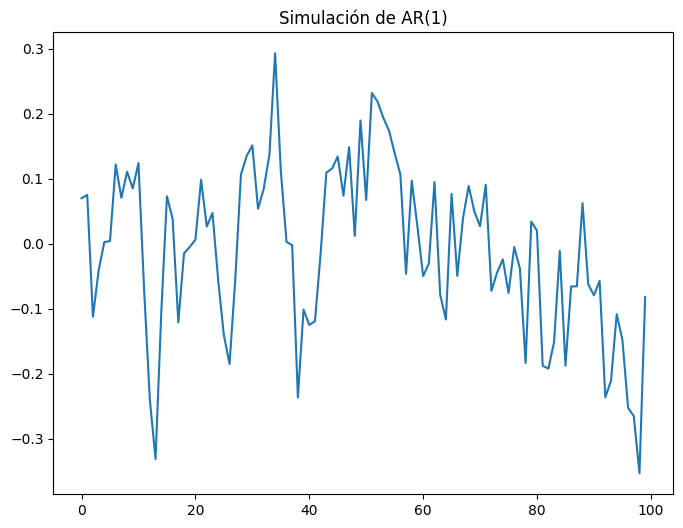

In [3]:
phi = 0.6
sigma = 0.1
N = 100
L = AR_1(phi, sigma, N)

plt.figure(figsize = (8,6))
plt.plot(np.arange(N),
         L,
         '-'
         )
plt.title('Simulación de AR(1)')
plt.show()

Verifiquemos la distribución límite.

In [4]:
phi = 0.6
sigma = 0.5
N = 50_000
nro_obs = 2_000

puntos = np.linspace(-2,2,1000)
f_normal = np.vectorize( lambda x, sigma: np.exp(-x**2/(2*sigma**2)) / np.sqrt(2*np.pi*sigma**2) )

In [5]:
L = []
for _ in range(nro_obs):
    L.append(AR_1(phi, sigma, N)[-1])

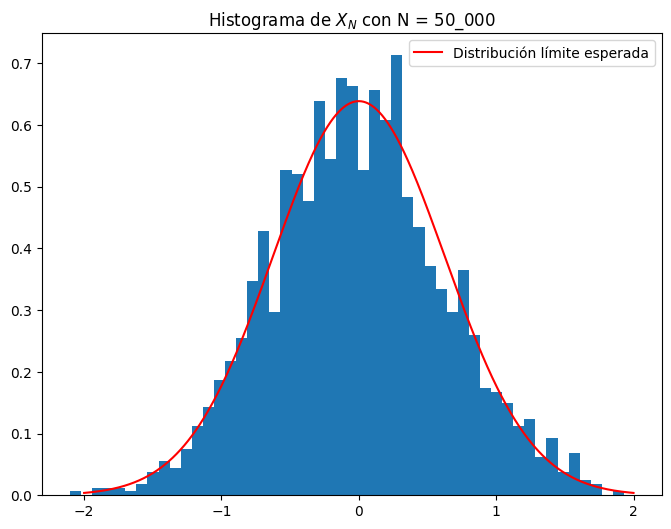

In [6]:
plt.figure(figsize = (8,6))
plt.hist(L,
         bins = 50,
         density = True,
         zorder = 0
         )
plt.plot(puntos,
         f_normal(puntos, sigma / np.sqrt(1-phi**2)),
         zorder = 1,
         c = 'red',
         label = 'Distribución límite esperada'
         )
plt.title(f'Histograma de $X_N$ con {N = :_}')
plt.legend()
plt.show()

### 2. Considere la matriz de transición:
### $$P = \begin{pmatrix} 0.15 & 0.35 & 0.35 & 0.15 \\ 0.166 & 0.334 & 0.334 & 0.166 \\ 0.1875 & 0.3125 & 0.3125 & 0.1875 \\ 0.2 & 0.3 & 0.3 & 0.2\end{pmatrix}$$ Que genera secuencias de ADN de nucleótidos A, C, G, T, acorde a una cadena de Markov con la matriz de transición anterior. La distribución inicial es $p_A = 0.2$, $p_C = 0.1$, $p_G = 0.1$, $p_T = 0.6$.
### El contenido GC de la cadena de ADN se define como el porcentaje de C’s y G’s de la cadena.

In [7]:
P = np.array([
    [0.15, 0.35, 0.35, 0.15],
    [0.166, 0.334, 0.334, 0.166],
    [0.1875, 0.3125, 0.3125, 0.1875],
    [0.2, 0.3, 0.3, 0.2]
])

np.sum(P, axis = 1)

array([1., 1., 1., 1.])

#### a) Simule la cadena de Markov anterior considerando 1000 pasos, y calcule el porcentaje de GC. Para lo anterior consideremos $A = 1$, $C = 2$, $G = 3$, $T = 4$ y la cadena de Markov $X_t$ que nos da el nucleotido en la posición $t$. Además use el siguiente pseudocódigo:

> Cadena de ADN

> Dado $X_t = x$:
>>1. Definir $p = P_x$, ie $p$ es la columna x-ésima de $P$
>>2. Generar $U \sim U[0,1]$
>>3. Para $i=1$:
>>    
>>    Si $u\leq \sum_{j=1}^i p_i$:
>>    
>>    1. $X_{t+1} = i$
>>    2. Break

In [8]:
np.random.choice(['A', 'C', 'G', 'T'], p = [0.2,0.1,0.1,0.6])


'T'

In [9]:
def ADN(P, N = 1_000):
    nucleotidos = ['A', 'C', 'G', 'T']
    L = [np.random.choice(nucleotidos, p = [0.2,0.1,0.1,0.6])] # Iniciamos la cadena según la distribución inicial.
    for _ in range(N):
        L.append(np.random.choice(nucleotidos, p = P[nucleotidos.index(L[-1])]))
    return np.array(L)

In [10]:
L = ADN(P)

# Porcentaje de GC
L[(L =='G') | (L == 'C')].size / 1_000

0.646

#### b) Verifique si la cadena tiene distribucion invariante.

`Solución:` Buscamos $\pi = (\pi_1, \pi_2, \pi_3, \pi_4)$ tal que, $\sum \pi_i = 1$, $\pi_i \geq 0$ y $\pi = \pi P$. Por lo tanto, buscamos un vector propio con valor propio 1 de la matriz $P^\top$.

Según WolframAlpha el espacio propio de $\lambda = 1$ es $\langle \left(1, \frac{1300}{707}, \frac{1300}{707}, 1\right)\rangle$. Por lo tanto, la distribución invariante $\pi$ viene dada por:
$$\pi = \left(\frac{707}{4014}, \frac{1300}{4014}, \frac{1300}{4014}, \frac{707}{4014}\right).$$

In [11]:
pi = np.array([707/4014, 1300/4014, 1300/4014, 707/4014])
pi

array([0.17613353, 0.32386647, 0.32386647, 0.17613353])

#### c) Encuentre computacionalmente (a través de simulaciones) y analíticamente la distribución límite de la cadena.

#### __Hint:__ Puede usar los resultados conocidos de anteriores cursos.

`Solución:` Analíticamente, sabemos que la distribución límite se obtiene como fila en la matriz: $\lim_{n\to\infty} P^n$.

De WolframAlpha tenemos que la diagonalización de la matriz $P$ viene dada por $P = S D S^{-1}$ donde

$$S = \begin{pmatrix} -1049/958 & -1 & 0 & 1 \\ -10169/23950 & 0 & -1 & 1 \\ 1825/3832 & 0 & 1 & 1 \\ 1 & 1 & 0 & 1 \end{pmatrix} \qquad D = \operatorname{diag}(-7/2000, 0, 0, 1)$$

Luego, note que

$$\lim_{n\to \infty} P^n = S\left(\lim_{n\to \infty} D^n\right)S^{-1} = S \left(\operatorname{diag}(0, 0, 0, 1) \right) S^{-1} =
\begin{pmatrix} fila \\ fila\\ fila \\ fila \end{pmatrix}$$

donde $$fila =  \left(\frac{707}{4014}, \frac{650}{2007}, \frac{650}{2007},\frac{707}{4014} \right) = \pi$$

Por lo tanto, la distribución límite corresponde a la invariante.


In [12]:
S = np.array([[-1049/958, -1, 0, 1],
              [-10169/23950, 0, -1, 1],
              [1825/3832, 0, 1, 1],
              [1, 1, 0, 1]])

D = np.diag([-7/2000,0,0,1])

S @ D @ np.linalg.inv(S)

array([[0.15  , 0.35  , 0.35  , 0.15  ],
       [0.166 , 0.334 , 0.334 , 0.166 ],
       [0.1875, 0.3125, 0.3125, 0.1875],
       [0.2   , 0.3   , 0.3   , 0.2   ]])

In [13]:
S @ np.diag([0,0,0,1]) @ np.linalg.inv(S)

array([[0.17613353, 0.32386647, 0.32386647, 0.17613353],
       [0.17613353, 0.32386647, 0.32386647, 0.17613353],
       [0.17613353, 0.32386647, 0.32386647, 0.17613353],
       [0.17613353, 0.32386647, 0.32386647, 0.17613353]])

In [14]:
pi

array([0.17613353, 0.32386647, 0.32386647, 0.17613353])

Veamos computacionalmente. Para aproximar la distribución límite se contará las veces que aparece cada nucleótido y se dividirá por el largo de la cadena.

In [15]:
N = 1_000_000
L = ADN(P, N)

np.unique(L, return_counts = True)[1] / N

array([0.176511, 0.32344 , 0.324173, 0.175877])

Notamos que en efecto se aproxima a $\pi$.